## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 0.9811731	total: 69.6ms	remaining: 1m 9s
1:	learn: 0.9619383	total: 71.4ms	remaining: 35.6s
2:	learn: 0.9422030	total: 72.6ms	remaining: 24.1s
3:	learn: 0.9253760	total: 73.8ms	remaining: 18.4s
4:	learn: 0.9080573	total: 74.9ms	remaining: 14.9s
5:	learn: 0.8916599	total: 75.8ms	remaining: 12.6s
6:	learn: 0.8766037	total: 76.9ms	remaining: 10.9s
7:	learn: 0.8605603	total: 78ms	remaining: 9.68s
8:	learn: 0.8450524	total: 79.9ms	remaining: 8.8s
9:	learn: 0.8290906	total: 80.8ms	remaining: 8s
10:	learn: 0.8154066	total: 81.8ms	remaining: 7.35s
11:	learn: 0.8011635	total: 82.7ms	remaining: 6.81s
12:	learn: 0.7862982	total: 83.6ms	remaining: 6.35s
13:	learn: 0.7716962	total: 84.6ms	remaining: 5.96s
14:	learn: 0.7595283	total: 85.6ms	remaining: 5.62s
15:	learn: 0.7459665	total: 86.5ms	remaining: 5.32s
16:	learn: 0.7341450	total: 87.5ms	remaining: 5.06s
17:	learn: 0.7213989	total: 89.3ms	remaining: 4.87s
18:	learn: 0.7094101	total: 90.3ms	remaining: 4.66

42:	learn: 0.5069163	total: 110ms	remaining: 2.45s
43:	learn: 0.5004918	total: 111ms	remaining: 2.41s
44:	learn: 0.4947967	total: 112ms	remaining: 2.37s
45:	learn: 0.4874741	total: 113ms	remaining: 2.33s
46:	learn: 0.4825413	total: 113ms	remaining: 2.3s
47:	learn: 0.4770539	total: 114ms	remaining: 2.26s
48:	learn: 0.4712199	total: 115ms	remaining: 2.23s
49:	learn: 0.4665631	total: 116ms	remaining: 2.2s
50:	learn: 0.4618167	total: 116ms	remaining: 2.17s
51:	learn: 0.4572319	total: 117ms	remaining: 2.13s
52:	learn: 0.4520688	total: 118ms	remaining: 2.11s
53:	learn: 0.4485357	total: 118ms	remaining: 2.07s
54:	learn: 0.4443203	total: 119ms	remaining: 2.05s
55:	learn: 0.4397836	total: 120ms	remaining: 2.02s
56:	learn: 0.4363247	total: 121ms	remaining: 2s
57:	learn: 0.4321604	total: 122ms	remaining: 1.97s
58:	learn: 0.4284254	total: 122ms	remaining: 1.95s
59:	learn: 0.4250269	total: 123ms	remaining: 1.93s
60:	learn: 0.4208297	total: 124ms	remaining: 1.91s
61:	learn: 0.4162073	total: 125ms	re

142:	learn: 0.2714116	total: 192ms	remaining: 1.15s
143:	learn: 0.2706915	total: 193ms	remaining: 1.15s
144:	learn: 0.2700675	total: 194ms	remaining: 1.14s
145:	learn: 0.2689436	total: 195ms	remaining: 1.14s
146:	learn: 0.2683950	total: 196ms	remaining: 1.13s
147:	learn: 0.2680048	total: 196ms	remaining: 1.13s
148:	learn: 0.2668393	total: 197ms	remaining: 1.13s
149:	learn: 0.2662739	total: 198ms	remaining: 1.12s
150:	learn: 0.2650087	total: 199ms	remaining: 1.12s
151:	learn: 0.2643253	total: 200ms	remaining: 1.11s
152:	learn: 0.2634162	total: 200ms	remaining: 1.11s
153:	learn: 0.2627830	total: 201ms	remaining: 1.1s
154:	learn: 0.2623300	total: 202ms	remaining: 1.1s
155:	learn: 0.2613065	total: 203ms	remaining: 1.1s
156:	learn: 0.2608171	total: 204ms	remaining: 1.09s
157:	learn: 0.2601098	total: 204ms	remaining: 1.09s
158:	learn: 0.2597019	total: 205ms	remaining: 1.08s
159:	learn: 0.2589798	total: 206ms	remaining: 1.08s
160:	learn: 0.2581041	total: 207ms	remaining: 1.08s
161:	learn: 0.2

272:	learn: 0.2017924	total: 300ms	remaining: 800ms
273:	learn: 0.2013312	total: 301ms	remaining: 799ms
274:	learn: 0.2009899	total: 302ms	remaining: 797ms
275:	learn: 0.2004386	total: 303ms	remaining: 795ms
276:	learn: 0.1999046	total: 304ms	remaining: 794ms
277:	learn: 0.1995704	total: 305ms	remaining: 792ms
278:	learn: 0.1989607	total: 306ms	remaining: 791ms
279:	learn: 0.1985500	total: 307ms	remaining: 789ms
280:	learn: 0.1980698	total: 308ms	remaining: 788ms
281:	learn: 0.1977798	total: 309ms	remaining: 786ms
282:	learn: 0.1970836	total: 310ms	remaining: 785ms
283:	learn: 0.1966477	total: 312ms	remaining: 785ms
284:	learn: 0.1964373	total: 312ms	remaining: 784ms
285:	learn: 0.1960959	total: 313ms	remaining: 782ms
286:	learn: 0.1958373	total: 314ms	remaining: 780ms
287:	learn: 0.1955853	total: 315ms	remaining: 778ms
288:	learn: 0.1953424	total: 316ms	remaining: 776ms
289:	learn: 0.1950334	total: 317ms	remaining: 775ms
290:	learn: 0.1945938	total: 317ms	remaining: 773ms
291:	learn: 

369:	learn: 0.1686202	total: 382ms	remaining: 651ms
370:	learn: 0.1682427	total: 383ms	remaining: 650ms
371:	learn: 0.1678035	total: 384ms	remaining: 648ms
372:	learn: 0.1674499	total: 385ms	remaining: 647ms
373:	learn: 0.1674004	total: 386ms	remaining: 645ms
374:	learn: 0.1669093	total: 386ms	remaining: 644ms
375:	learn: 0.1668346	total: 387ms	remaining: 643ms
376:	learn: 0.1664408	total: 388ms	remaining: 641ms
377:	learn: 0.1662130	total: 389ms	remaining: 640ms
378:	learn: 0.1657752	total: 390ms	remaining: 639ms
379:	learn: 0.1654713	total: 391ms	remaining: 637ms
380:	learn: 0.1649896	total: 391ms	remaining: 636ms
381:	learn: 0.1647001	total: 392ms	remaining: 634ms
382:	learn: 0.1644679	total: 393ms	remaining: 633ms
383:	learn: 0.1642089	total: 394ms	remaining: 632ms
384:	learn: 0.1638085	total: 395ms	remaining: 630ms
385:	learn: 0.1635725	total: 396ms	remaining: 629ms
386:	learn: 0.1631651	total: 396ms	remaining: 628ms
387:	learn: 0.1626923	total: 397ms	remaining: 626ms
388:	learn: 

499:	learn: 0.1324908	total: 491ms	remaining: 491ms
500:	learn: 0.1323480	total: 492ms	remaining: 490ms
501:	learn: 0.1320869	total: 492ms	remaining: 489ms
502:	learn: 0.1318877	total: 493ms	remaining: 487ms
503:	learn: 0.1315814	total: 494ms	remaining: 486ms
504:	learn: 0.1313048	total: 495ms	remaining: 485ms
505:	learn: 0.1311140	total: 496ms	remaining: 484ms
506:	learn: 0.1307942	total: 496ms	remaining: 483ms
507:	learn: 0.1305973	total: 497ms	remaining: 481ms
508:	learn: 0.1302839	total: 498ms	remaining: 480ms
509:	learn: 0.1302683	total: 499ms	remaining: 479ms
510:	learn: 0.1300244	total: 500ms	remaining: 478ms
511:	learn: 0.1295833	total: 500ms	remaining: 477ms
512:	learn: 0.1292647	total: 501ms	remaining: 476ms
513:	learn: 0.1290228	total: 502ms	remaining: 475ms
514:	learn: 0.1288297	total: 503ms	remaining: 474ms
515:	learn: 0.1285979	total: 504ms	remaining: 473ms
516:	learn: 0.1283088	total: 505ms	remaining: 472ms
517:	learn: 0.1279767	total: 506ms	remaining: 471ms
518:	learn: 

599:	learn: 0.1110257	total: 573ms	remaining: 382ms
600:	learn: 0.1107985	total: 574ms	remaining: 381ms
601:	learn: 0.1106343	total: 574ms	remaining: 380ms
602:	learn: 0.1104366	total: 575ms	remaining: 379ms
603:	learn: 0.1102431	total: 576ms	remaining: 378ms
604:	learn: 0.1100229	total: 577ms	remaining: 377ms
605:	learn: 0.1099151	total: 578ms	remaining: 376ms
606:	learn: 0.1096809	total: 579ms	remaining: 375ms
607:	learn: 0.1095798	total: 579ms	remaining: 373ms
608:	learn: 0.1094111	total: 580ms	remaining: 372ms
609:	learn: 0.1092544	total: 581ms	remaining: 371ms
610:	learn: 0.1091114	total: 582ms	remaining: 370ms
611:	learn: 0.1088260	total: 583ms	remaining: 369ms
612:	learn: 0.1086632	total: 584ms	remaining: 368ms
613:	learn: 0.1084424	total: 584ms	remaining: 367ms
614:	learn: 0.1082786	total: 585ms	remaining: 366ms
615:	learn: 0.1080545	total: 586ms	remaining: 365ms
616:	learn: 0.1077747	total: 587ms	remaining: 364ms
617:	learn: 0.1075524	total: 588ms	remaining: 363ms
618:	learn: 

731:	learn: 0.0892370	total: 681ms	remaining: 249ms
732:	learn: 0.0890981	total: 682ms	remaining: 249ms
733:	learn: 0.0889062	total: 683ms	remaining: 248ms
734:	learn: 0.0888029	total: 684ms	remaining: 247ms
735:	learn: 0.0887302	total: 685ms	remaining: 246ms
736:	learn: 0.0884971	total: 686ms	remaining: 245ms
737:	learn: 0.0883422	total: 687ms	remaining: 244ms
738:	learn: 0.0881913	total: 687ms	remaining: 243ms
739:	learn: 0.0879788	total: 688ms	remaining: 242ms
740:	learn: 0.0878099	total: 689ms	remaining: 241ms
741:	learn: 0.0877586	total: 690ms	remaining: 240ms
742:	learn: 0.0877436	total: 691ms	remaining: 239ms
743:	learn: 0.0875541	total: 691ms	remaining: 238ms
744:	learn: 0.0874226	total: 692ms	remaining: 237ms
745:	learn: 0.0874088	total: 693ms	remaining: 236ms
746:	learn: 0.0873448	total: 694ms	remaining: 235ms
747:	learn: 0.0871505	total: 695ms	remaining: 234ms
748:	learn: 0.0869958	total: 696ms	remaining: 233ms
749:	learn: 0.0868761	total: 696ms	remaining: 232ms
750:	learn: 

831:	learn: 0.0779228	total: 763ms	remaining: 154ms
832:	learn: 0.0778504	total: 764ms	remaining: 153ms
833:	learn: 0.0777013	total: 765ms	remaining: 152ms
834:	learn: 0.0776053	total: 766ms	remaining: 151ms
835:	learn: 0.0774863	total: 766ms	remaining: 150ms
836:	learn: 0.0773914	total: 767ms	remaining: 149ms
837:	learn: 0.0773389	total: 768ms	remaining: 148ms
838:	learn: 0.0772286	total: 769ms	remaining: 148ms
839:	learn: 0.0770671	total: 770ms	remaining: 147ms
840:	learn: 0.0770039	total: 771ms	remaining: 146ms
841:	learn: 0.0769330	total: 771ms	remaining: 145ms
842:	learn: 0.0767164	total: 772ms	remaining: 144ms
843:	learn: 0.0765448	total: 773ms	remaining: 143ms
844:	learn: 0.0764452	total: 774ms	remaining: 142ms
845:	learn: 0.0763739	total: 775ms	remaining: 141ms
846:	learn: 0.0762203	total: 775ms	remaining: 140ms
847:	learn: 0.0760737	total: 776ms	remaining: 139ms
848:	learn: 0.0760028	total: 777ms	remaining: 138ms
849:	learn: 0.0758749	total: 778ms	remaining: 137ms
850:	learn: 

963:	learn: 0.0643153	total: 872ms	remaining: 32.5ms
964:	learn: 0.0643003	total: 873ms	remaining: 31.6ms
965:	learn: 0.0641544	total: 873ms	remaining: 30.7ms
966:	learn: 0.0640598	total: 874ms	remaining: 29.8ms
967:	learn: 0.0639657	total: 875ms	remaining: 28.9ms
968:	learn: 0.0639258	total: 876ms	remaining: 28ms
969:	learn: 0.0638366	total: 877ms	remaining: 27.1ms
970:	learn: 0.0637150	total: 878ms	remaining: 26.2ms
971:	learn: 0.0636851	total: 879ms	remaining: 25.3ms
972:	learn: 0.0635830	total: 879ms	remaining: 24.4ms
973:	learn: 0.0635144	total: 880ms	remaining: 23.5ms
974:	learn: 0.0633994	total: 881ms	remaining: 22.6ms
975:	learn: 0.0633542	total: 882ms	remaining: 21.7ms
976:	learn: 0.0632177	total: 883ms	remaining: 20.8ms
977:	learn: 0.0631549	total: 883ms	remaining: 19.9ms
978:	learn: 0.0630449	total: 884ms	remaining: 19ms
979:	learn: 0.0629108	total: 885ms	remaining: 18.1ms
980:	learn: 0.0628365	total: 886ms	remaining: 17.2ms
981:	learn: 0.0628012	total: 887ms	remaining: 16.3

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

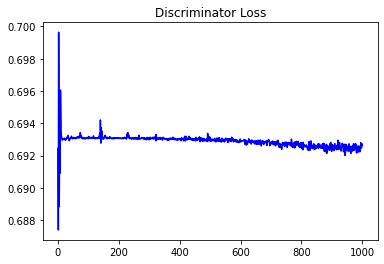

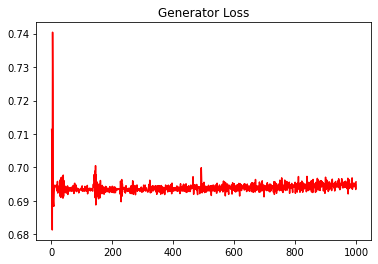

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.0902167529781095


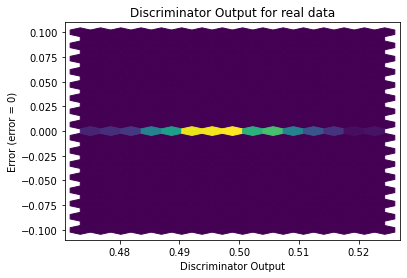

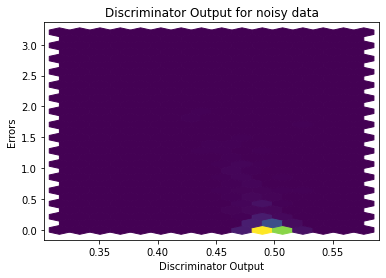

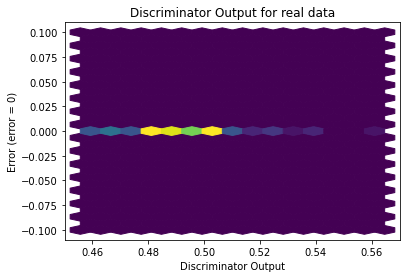

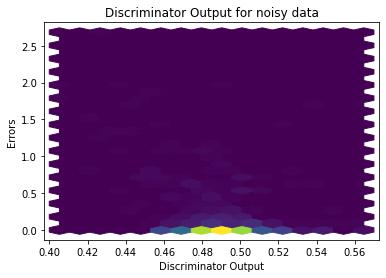

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


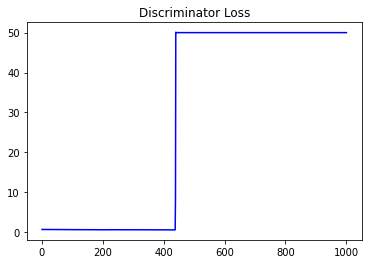

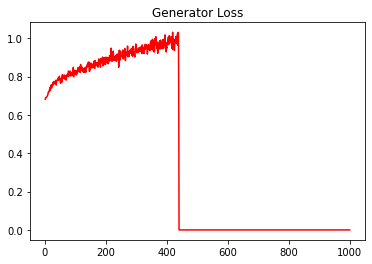

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
103.57788210193574


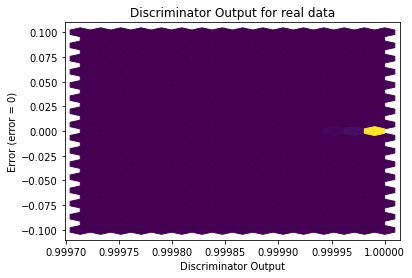

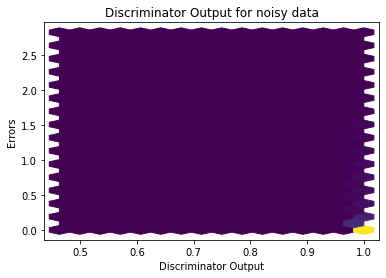

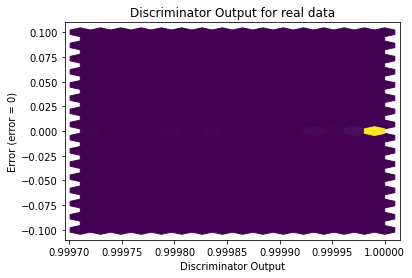

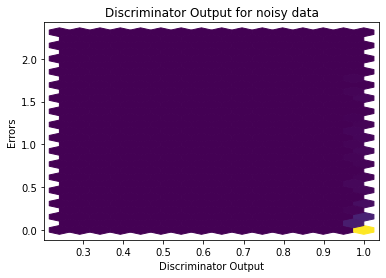

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0400]], requires_grad=True)
